<a href="https://colab.research.google.com/github/ameliabaier17/ocean_project/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [2]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr
import os


# Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/Ocean"

adcp-saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1_minutes-v1.1597092482498.nc
data_cleaning.ipynb
surface-saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1_minutes-v1.1620360815446.nc


In [6]:
# read in data
ant_adcp_file = '/content/drive/My Drive/Ocean/adcp-saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1_minutes-v1.1597092482498.nc'
ant_sur_file = '/content/drive/My Drive/Ocean/surface-saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1_minutes-v1.1620360815446.nc'

In [7]:
# use xarray to open netcdf
ds_adcp = xr.open_dataset(ant_adcp_file)
adcp_vars = list(ds_adcp.variables)
print("adcp data:\n",adcp_vars,"\n")

ds_sur = xr.open_dataset(ant_sur_file)
sur_vars = list(ds_sur.variables)
print("surface data:\n",sur_vars,"\n")

adcp data:
 ['trajectory', 'cell_depth', 'time', 'latitude', 'longitude', 'roll', 'pitch', 'heading', 'vel_east', 'vel_north', 'vel_up', 'error_vel', 'echo_intensity', 'correlation', 'nav_start_time', 'nav_end_time', 'nav_start_latitude', 'nav_end_latitude', 'nav_start_longitude', 'nav_end_longitude', 'vehicle_vel_north', 'vehicle_vel_east', 'vehicle_vel_up', 'bt_range', 'bt_cor', 'bt_vel_east', 'bt_vel_north', 'bt_vel_up', 'bt_amp', 'bt_percent_good', 'percent_good_4_beam', 'percent_good_3_beam', 'percent_good'] 

surface data:
 ['SOG', 'COG', 'HDG', 'HDG_WING', 'WING_ANGLE', 'UWND_MEAN', 'UWND_STDDEV', 'VWND_MEAN', 'VWND_STDDEV', 'WWND_MEAN', 'WWND_STDDEV', 'GUST_WND_MEAN', 'GUST_WND_STDDEV', 'WIND_MEASUREMENT_HEIGHT_MEAN', 'WIND_MEASUREMENT_HEIGHT_STDDEV', 'TEMP_AIR_MEAN', 'TEMP_AIR_STDDEV', 'RH_MEAN', 'RH_STDDEV', 'BARO_PRES_MEAN', 'BARO_PRES_STDDEV', 'PAR_AIR_MEAN', 'PAR_AIR_STDDEV', 'TEMP_IR_SEA_WING_UNCOMP_MEAN', 'TEMP_IR_SEA_WING_UNCOMP_STDDEV', 'WAVE_DOMINANT_PERIOD', 'WAVE_SI

In [8]:
# create function to pull stats for xarray data variables:

def var_summary(ds, variable):
  var = ds[variable]

  stats = {'min': var.min().item(),
           'max': var.max().item(),
           'mean': var.mean().item(),
           'median': var.median().item(),
           'std': var.std().item(),
           'total vals': var.count().item(),
           'missing vals': np.isnan(var).sum().item()}

  return stats

In [9]:
# explore adcp variables:
print("vel_east:\n",var_summary(ds_adcp, 'vel_east'))
print("vel_north:\n",var_summary(ds_adcp, 'vel_north'))
print("vel_up:\n",var_summary(ds_adcp, 'vel_up'))
print("error_vel:\n",var_summary(ds_adcp, 'error_vel'))
# 3.8% missing values

vel_east:
 {'min': -4.154, 'max': 4.926, 'mean': 0.10650689752259915, 'median': 0.082, 'std': 0.26687827253960517, 'total vals': 1836239, 'missing vals': 69011}
vel_north:
 {'min': -4.946, 'max': 4.141, 'mean': 0.023440067442201146, 'median': 0.018, 'std': 0.25311371640292996, 'total vals': 1836239, 'missing vals': 69011}
vel_up:
 {'min': -2.853, 'max': 4.503, 'mean': -0.002682303338508769, 'median': -0.008, 'std': 0.11192679176710099, 'total vals': 1836239, 'missing vals': 69011}
error_vel:
 {'min': -1.919, 'max': 0.385, 'mean': 0.00011774556580053016, 'median': 0.0, 'std': 0.010286566210813496, 'total vals': 1836239, 'missing vals': 69011}


In [10]:
# explore surface variables:
print("CHLOR_RBR_MEAN:\n",var_summary(ds_sur, 'CHLOR_RBR_MEAN'))#CHLOR_RBR_MEAN
print("SAL_RBR_MEAN:\n",var_summary(ds_sur, 'SAL_RBR_MEAN'))
print("O2_CONC_RBR_MEAN:\n",var_summary(ds_sur, 'O2_CONC_RBR_MEAN'))
#print("PAR_AIR_MEAN:\n",var_summary(ds_sur, 'PAR_AIR_MEAN')) # more missing than non-missing values
print("TEMP_CTD_RBR_MEAN:\n",var_summary(ds_sur, 'TEMP_CTD_RBR_MEAN'))
print("WAVE_SIGNIFICANT_HEIGHT:\n",var_summary(ds_sur, 'WAVE_SIGNIFICANT_HEIGHT'))

# 3.8% missing values

CHLOR_RBR_MEAN:
 {'min': 0.1524, 'max': 593.005, 'mean': 5.890829873830939, 'median': 1.8987, 'std': 24.678477592184322, 'total vals': 229137, 'missing vals': 53134}
SAL_RBR_MEAN:
 {'min': 29.916, 'max': 34.96, 'mean': 34.050855313633335, 'median': 33.989, 'std': 0.263266705422514, 'total vals': 229137, 'missing vals': 53134}
O2_CONC_RBR_MEAN:
 {'min': 239.77, 'max': 327.82, 'mean': 290.47169863444134, 'median': 294.32, 'std': 16.089129620771068, 'total vals': 229137, 'missing vals': 53134}
TEMP_CTD_RBR_MEAN:
 {'min': -0.758, 'max': 15.997, 'mean': 4.844974761823713, 'median': 4.062, 'std': 3.1824408077785376, 'total vals': 229137, 'missing vals': 53134}
WAVE_SIGNIFICANT_HEIGHT:
 {'min': 0.537, 'max': 11.958, 'mean': 4.133511344952318, 'median': 3.919, 'std': 1.4962669502189898, 'total vals': 9123, 'missing vals': 273148}


In [12]:
# explore potential anomaly thresholds
df_sur = ds_sur[['TEMP_CTD_RBR_MEAN','time']].to_dataframe()
df_sur.reset_index(inplace=True)
df_sur.describe()

,trajectory,obs,TEMP_CTD_RBR_MEAN,latitude,longitude
count,282271.0,282271.000000,229137.000000,239091.000000,239091.000000
mean,1020.0,141135.000000,4.844975,-54.103547,-13.450382
std,0.0,81484.763255,3.182448,3.881574,98.073896
min,1020.0,0.000000,-0.758000,-60.986221,-179.998682
25%,1020.0,70567.500000,2.407000,-57.551366,-95.698118
50%,1020.0,141135.000000,4.062000,-53.632378,-12.751301
75%,1020.0,211702.500000,7.194000,-51.720562,53.214438
max,1020.0,282270.000000,15.997000,-46.427757,179.999731


In [13]:
df_vel_up = ds_adcp[['vel_east','time']].to_dataframe()
df_vel_up.describe()

,vel_east,latitude,longitude
count,1.836239e+06,1.905250e+06,1.905250e+06
mean,1.065069e-01,-5.391966e+01,-6.209139e+00
std,2.668783e-01,3.629374e+00,9.754561e+01
min,-4.154000e+00,-6.098605e+01,-1.799936e+02
25%,-3.700000e-02,-5.712679e+01,-7.531579e+01
50%,8.200000e-02,-5.354407e+01,-1.111517e+01
75%,2.150000e-01,-5.168475e+01,7.840355e+01
max,4.926000e+00,-4.642878e+01,1.799895e+02


In [14]:
df_vel_up.head()

vel_east                time   latitude   longitude
trajectory obs cell_depth                                                     
1020.0     0   4.2           -0.584 2019-01-19 04:00:00 -46.683172  168.517128
               6.2           -0.594 2019-01-19 04:00:00 -46.683172  168.517128
               8.2           -0.534 2019-01-19 04:00:00 -46.683172  168.517128
               10.2          -0.564 2019-01-19 04:00:00 -46.683172  168.517128
               12.2          -0.559 2019-01-19 04:00:00 -46.683172  168.517128

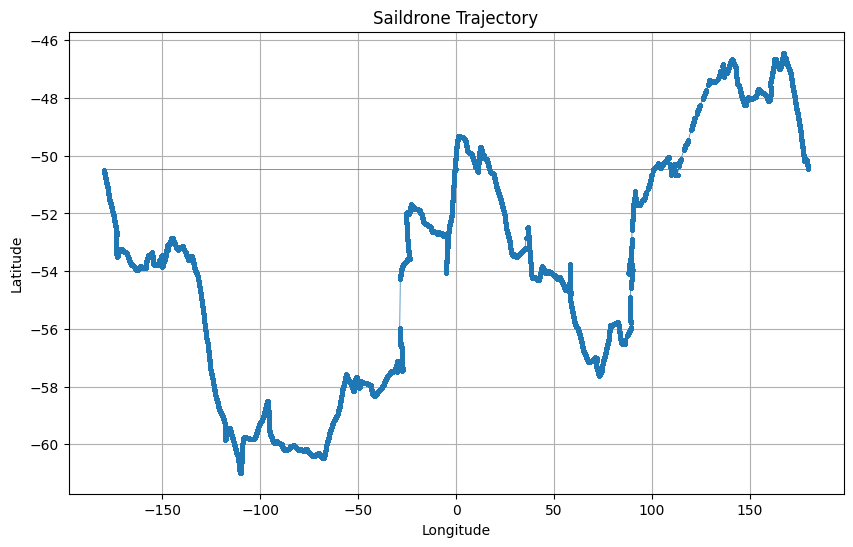

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df_vel_up['longitude'], df_vel_up['latitude'], marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.title('Saildrone Trajectory')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

(array([17928., 17956., 17987., 18017., 18048., 18078., 18109.]),
 [Text(17928.0, 0, '2019-02'),
  Text(17956.0, 0, '2019-03'),
  Text(17987.0, 0, '2019-04'),
  Text(18017.0, 0, '2019-05'),
  Text(18048.0, 0, '2019-06'),
  Text(18078.0, 0, '2019-07'),
  Text(18109.0, 0, '2019-08')])

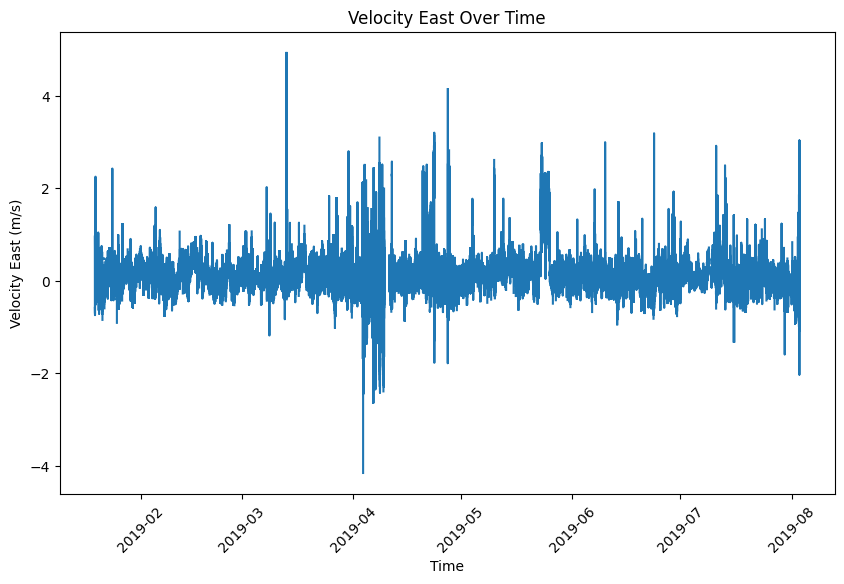

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_vel_up['time'], df_vel_up['vel_east'])
plt.title('Velocity East Over Time')
plt.xlabel('Time')
plt.ylabel('Velocity East (m/s)')
plt.xticks(rotation=45)


In [35]:
df_test = df_vel_up.copy()
df_test.reset_index(inplace=True)
df_test.head()

,trajectory,obs,cell_depth,vel_east,time,latitude,longitude
0,1020.0,0,4.2,-0.584,2019-01-19 04:00:00,-46.683172,168.517128
1,1020.0,0,6.2,-0.594,2019-01-19 04:00:00,-46.683172,168.517128
2,1020.0,0,8.2,-0.534,2019-01-19 04:00:00,-46.683172,168.517128
3,1020.0,0,10.2,-0.564,2019-01-19 04:00:00,-46.683172,168.517128
4,1020.0,0,12.2,-0.559,2019-01-19 04:00:00,-46.683172,168.517128


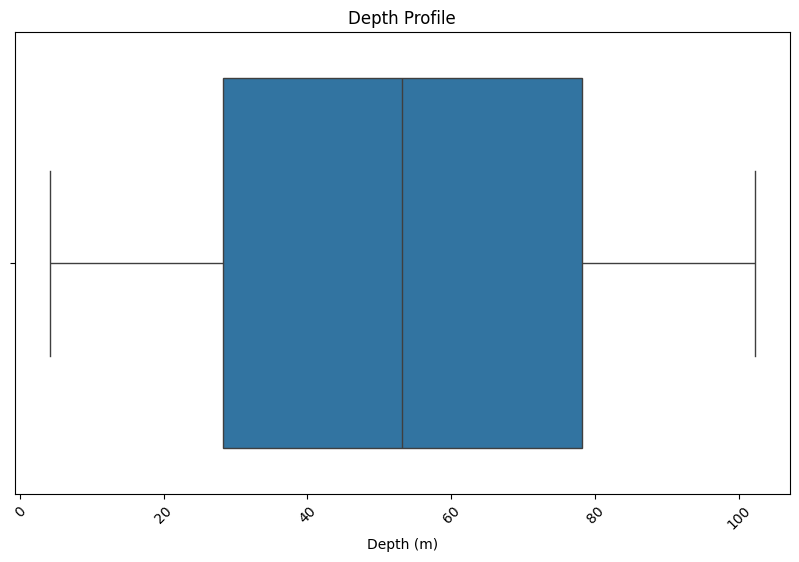

In [36]:
import seaborn as sns

if df_test['cell_depth'].nunique() > 1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cell_depth', data=df_test)
    plt.title('Depth Profile')
    plt.xlabel('Depth (m)')
    plt.xticks(rotation=45)